In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import LabelEncoder

In [3]:
testdata = pd.read_csv("testFeatGen.csv", encoding="utf8",low_memory = False)
validationdata = pd.read_csv("validationFeatGen.csv", encoding="utf8",low_memory = False)
traindata = pd.read_csv("trainFeatGen.csv", encoding="utf8",low_memory = False)

In [4]:
#add ID
#training_df['streamID'] = training_df.index + 1
testdata['streamID'] = testdata.index + 1
#valid_df['streamID'] = valid_df.index + 1

In [7]:
test_df_lof = pd.read_csv("test_df_lof.csv", encoding="utf8",low_memory = False)
valid_df_lof = pd.read_csv("valid_df_lof.csv", encoding="utf8",low_memory = False)
train_t_df_lof = pd.read_csv("train_t_df_lof.csv", encoding="utf8",low_memory = False)
train_v_df_lof = pd.read_csv("train_v_df_lof.csv", encoding="utf8",low_memory = False)

LOF

In [8]:
from sklearn.neighbors import LocalOutlierFactor

Contamination 0.001

Test

In [9]:
%%time
lof_t_1 = LocalOutlierFactor(n_neighbors = 35, contamination = 0.001)
labels_t_1 = lof_t_1.fit_predict(test_df_lof)

Wall time: 1min 4s


In [10]:
testresult_t_1 = copy.deepcopy(testdata)

In [11]:
testresult_t_1["lof"] = pd.Series(labels_t_1)
testresult_t_1["lof"] = testresult_t_1["lof"].map({1: 0, -1: 1})
print(testresult_t_1["lof"].value_counts())

0    1052791
1       1054
Name: lof, dtype: int64


In [12]:
testresult_t_1plot = testresult_t_1[testresult_t_1.lof==1]

<AxesSubplot:ylabel='src_ip'>

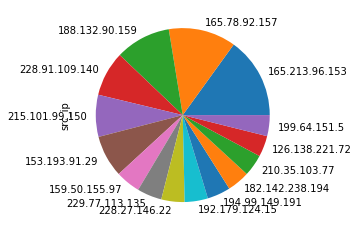

In [13]:
testresult_t_1plot.src_ip.value_counts()[:15].plot.pie()

<AxesSubplot:ylabel='dst_ip'>

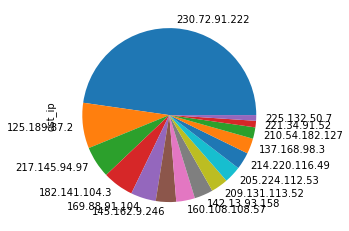

In [14]:
testresult_t_1plot.dst_ip.value_counts()[:15].plot.pie()

In [15]:
from sklearn.decomposition import IncrementalPCA
ipca_img = IncrementalPCA(n_components = 2, whiten = True, batch_size = 10)
ipca_img.fit(train_t_df_lof)

IncrementalPCA(batch_size=10, copy=True, n_components=2, whiten=True)

In [16]:
reduced_test_data_lof = ipca_img.transform(test_df_lof)

In [17]:
lof_plot_df = testresult_t_1[['lof']]

In [18]:
lof_plot_df['x'] = reduced_test_data_lof[:, 0]
lof_plot_df['y'] = reduced_test_data_lof[:, 1]

C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
import seaborn as sns

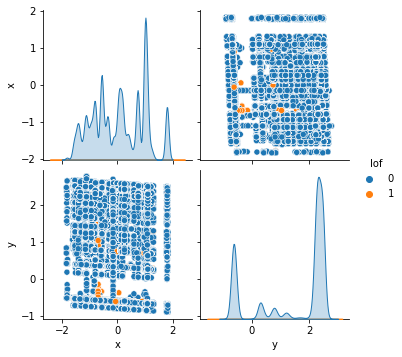

In [20]:
plot_lof_0001_allfeat = sns.pairplot(lof_plot_df, hue = 'lof')

In [21]:
plot_lof_0001_allfeat

In [22]:
plot_lof_0001_allfeat.savefig('plot_lof_0001_allfeat.png')

In [23]:
testresult_t_1plot.to_csv('test_result_lof_0001_allfeat.csv',index=False)

IPCA

In [24]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components = 5, whiten = True, batch_size = 10)
ipca.fit(train_t_df_lof)

IncrementalPCA(batch_size=10, copy=True, n_components=5, whiten=True)

In [25]:
#train_t_df_lof_ipca = ipca.transform(train_t_df_lof)
test_df_lof_ipca = ipca.transform(test_df_lof)

Test

In [26]:
%%time
lof_t_2 = LocalOutlierFactor(n_neighbors = 35, contamination = 0.001)
labels_t_2 = lof_t_2.fit_predict(test_df_lof_ipca)

Wall time: 31 s


In [27]:
testresult_t_2 = copy.deepcopy(testdata)

In [28]:
testresult_t_2["lof"] = pd.Series(labels_t_2)
testresult_t_2["lof"] = testresult_t_2["lof"].map({1: 0, -1: 1})
print(testresult_t_2["lof"].value_counts())

0    1052791
1       1054
Name: lof, dtype: int64


In [29]:
testresult_t_2plot = testresult_t_2[testresult_t_2.lof==1]

<AxesSubplot:ylabel='src_ip'>

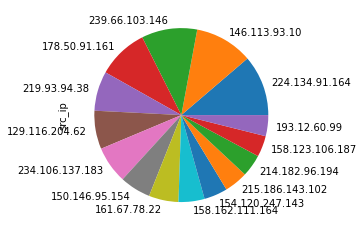

In [30]:
testresult_t_2plot.src_ip.value_counts()[:15].plot.pie()

<AxesSubplot:ylabel='dst_ip'>

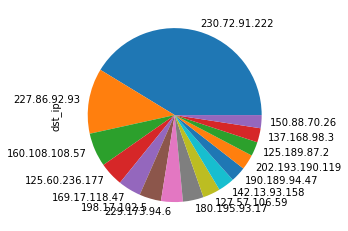

In [31]:
testresult_t_2plot.dst_ip.value_counts()[:15].plot.pie()

In [32]:
lof_plot_df_ipca = testresult_t_2[['lof']]

In [33]:
lof_plot_df_ipca['pc1'] = test_df_lof_ipca[:, 0]
lof_plot_df_ipca['pc2'] = test_df_lof_ipca[:, 1]
lof_plot_df_ipca['pc3'] = test_df_lof_ipca[:, 2]
lof_plot_df_ipca['pc4'] = test_df_lof_ipca[:, 3]
lof_plot_df_ipca['pc5'] = test_df_lof_ipca[:, 4]

C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [34]:
import seaborn as sns

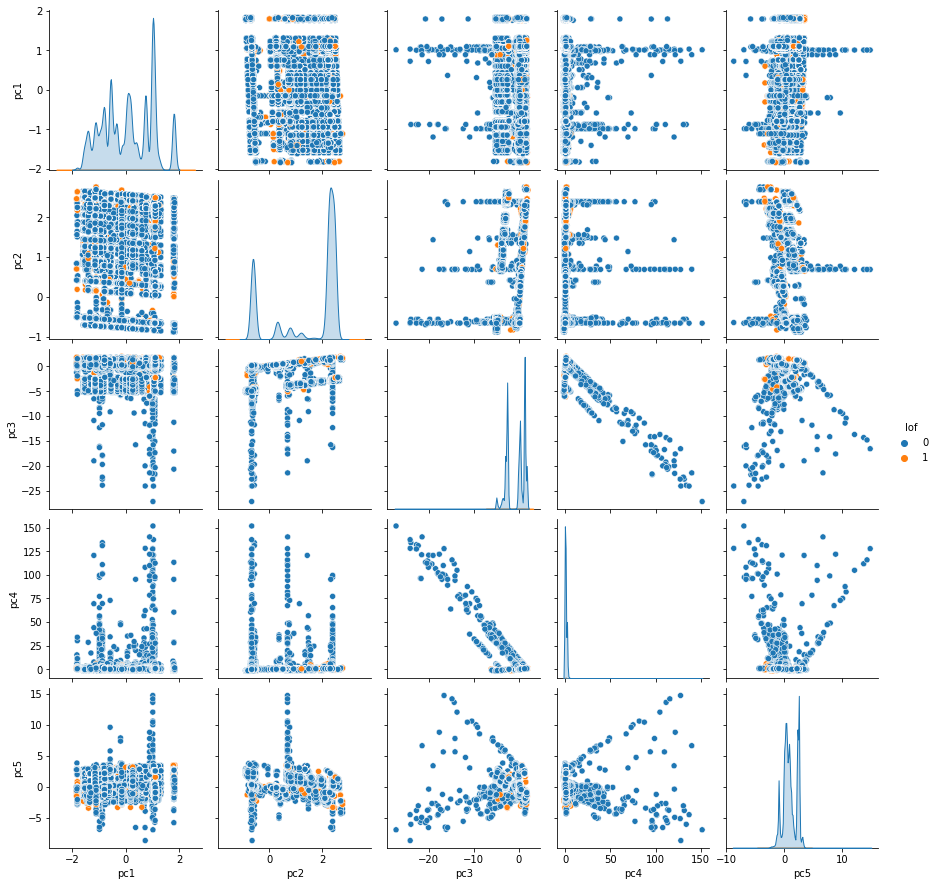

In [35]:
plot_lof_0001_ipca = sns.pairplot(lof_plot_df_ipca, hue = 'lof')

In [36]:
plot_lof_0001_ipca

In [37]:
plot_lof_0001_ipca.savefig('plot_lof_0001_ipca.png')

In [38]:
testresult_t_2plot.to_csv('test_result_lof_0001_ipca.csv',index=False)

Variance threshold

In [39]:
from sklearn.feature_selection import VarianceThreshold

In [40]:
threshold = VarianceThreshold(threshold = .95)
train_t_df_lof_var = threshold.fit_transform(train_t_df_lof)

In [41]:
threshold.variances_

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 4.32341755e+00, 1.15857721e+04, 3.67954642e-01,
       1.64749614e+00, 3.18676517e+12])

In [42]:
train_t_df_lof_var = train_t_df_lof.loc[:, threshold.get_support()]

In [43]:
train_t_df_lof_var = train_t_df_lof.drop(['src_type_service','dst_type_service'], 1)
train_v_df_lof_var = train_v_df_lof.drop(['src_type_service','dst_type_service'], 1)
test_df_lof_var = test_df_lof.drop(['src_type_service','dst_type_service'], 1)
valid_df_lof_var = valid_df_lof.drop(['src_type_service','dst_type_service'], 1)

Test

In [44]:
%%time
lof_t_3 = LocalOutlierFactor(n_neighbors = 35, contamination = 0.001)
labels_t_3 = lof_t_3.fit_predict(test_df_lof_var)

Wall time: 58.1 s


In [45]:
testresult_t_3 = copy.deepcopy(testdata)

In [46]:
testresult_t_3["lof"] = pd.Series(labels_t_3)
testresult_t_3["lof"] = testresult_t_3["lof"].map({1: 0, -1: 1})
print(testresult_t_3["lof"].value_counts())

0    1052791
1       1054
Name: lof, dtype: int64


In [47]:
testresult_t_3plot = testresult_t_3[testresult_t_3.lof==1]

<AxesSubplot:ylabel='src_ip'>

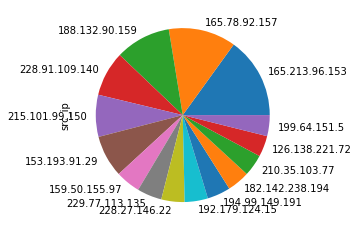

In [48]:
testresult_t_3plot.src_ip.value_counts()[:15].plot.pie()

<AxesSubplot:ylabel='dst_ip'>

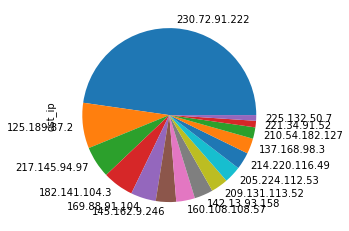

In [49]:
testresult_t_3plot.dst_ip.value_counts()[:15].plot.pie()

In [50]:
from sklearn.decomposition import IncrementalPCA
ipca_img_var = IncrementalPCA(n_components = 2, whiten = True, batch_size = 10)
ipca_img_var.fit(train_t_df_lof_var)

IncrementalPCA(batch_size=10, copy=True, n_components=2, whiten=True)

In [51]:
reduced_test_data_lof_var = ipca_img_var.transform(test_df_lof_var)

In [52]:
lof_plot_df_var = testresult_t_3[['lof']]

In [53]:
lof_plot_df_var['x'] = reduced_test_data_lof_var[:, 0]
lof_plot_df_var['y'] = reduced_test_data_lof_var[:, 1]

C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
import seaborn as sns

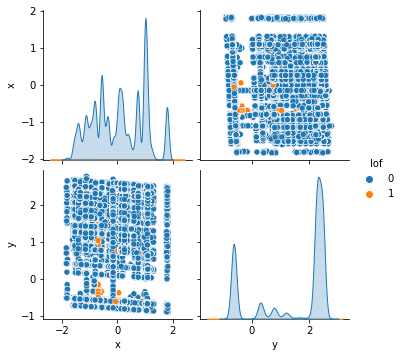

In [55]:
plot_lof_0001_var = sns.pairplot(lof_plot_df_var, hue = 'lof')

In [56]:
plot_lof_0001_var

In [57]:
plot_lof_0001_var.savefig('plot_lof_0001_var.png')

In [58]:
testresult_t_3plot.to_csv('test_result_lof_0001_var.csv',index=False)